In [1]:
!git clone https://github.com/Mackenzie-Beck/CS3220.git

Cloning into 'CS3220'...
remote: Enumerating objects: 760, done.
remote: Counting objects: 100% (760/760), done.
remote: Compressing objects: 100% (508/508), done.
remote: Total 760 (delta 351), reused 628 (delta 219), pack-reused 0 (from 0)
Receiving objects: 100% (760/760), 3.61 MiB | 9.59 MiB/s, done.
Resolving deltas: 100% (351/351), done.


In [4]:
class Problem:
    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost.
    The state space should be included in a subclass
    Then you will create instances of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal=None):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments.
        The variable initial specifies the initial state of the search problem.
        It represents the beginning state.
        From here, our agent begins its task of exploration to find the goal state(s) which is given in the goal parameter.
        """
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Return the actions that can be executed in the given
        state.
        This Problem class only deals with deterministic outcomes.
        So we know for sure what every action in a state would result to
        The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return self.goal.count(state)>0
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2. If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1


In [5]:
class GraphProblem(Problem):

    """The problem of searching a graph from one node to another."""
    '''
    The state space is stored as nested dictionaries
    G={'node1':{'neighbor1_of_Node1':distance_from_Node1_to_neighbor1_of_Node1,..},
       .....}

    '''

    def __init__(self, initial, goal, graph):
        super().__init__(initial, goal)
        self.graph = graph#The state space

    def actions(self, A):
        """The actions at a graph node are just its neighbors."""
        return list(self.graph.get(A).keys())

    def result(self, state, action):
      #A transition model
        """The result of going to a neighbor is just that neighbor."""
        return action

    def path_cost(self, cost_so_far, A, action, B):
      #An action cost function
        return cost_so_far + self.graph.get(A, B)

In [6]:
class FarmerProblem(GraphProblem):
    def __init__(self):
        initial_state = ('L', 'L', 'L', 'L') # (farmer, goat, cabbage, wolf)
        goal_state = ('R', 'R', 'R', 'R')
        graph = {
            ('L', 'L', 'L', 'L'): {('R', 'R', 'L', 'L'): 1, ('R', 'L', 'R', 'L'): 1, ('R', 'L', 'L', 'R'): 1, ('R', 'L', 'L', 'L'): 1},
            ('R', 'R', 'L', 'L'): {('L', 'L', 'L', 'L'): 1, ('L', 'R', 'R', 'L'): 1, ('L', 'R', 'L', 'R'): 1, ('L', 'R', 'L', 'L'): 1},
            ('R', 'L', 'R', 'L'): {('L', 'L', 'R', 'L'): 1, ('L', 'L', 'L', 'L'): 1, ('L', 'L', 'R', 'R'): 1, ('L', 'L', 'R', 'L'): 1},
            ('R', 'L', 'L', 'R'): {('L', 'L', 'L', 'R'): 1, ('L', 'L', 'R', 'R'): 1, ('L', 'L', 'L', 'L'): 1, ('L', 'L', 'L', 'R'): 1},
            ('R', 'L', 'L', 'L'): {('L', 'L', 'L', 'L'): 1, ('L', 'L', 'R', 'L'): 1, ('L', 'L', 'L', 'R'): 1, ('L', 'L', 'L', 'L'): 1},
            ('L', 'L', 'R', 'L'): {('R', 'L', 'R', 'L'): 1, ('R', 'R', 'R', 'L'): 1, ('R', 'L', 'L', 'L'): 1, ('R', 'L', 'R', 'R'): 1},
            ('L', 'L', 'L', 'R'): {('R', 'L', 'L', 'R'): 1, ('R', 'R', 'L', 'R'): 1, ('R', 'L', 'L', 'L'): 1, ('R', 'L', 'R', 'R'): 1},
            ('L', 'L', 'L', 'L'): {('R', 'L', 'L', 'L'): 1, ('R', 'R', 'L', 'L'): 1, ('R', 'L', 'R', 'L'): 1, ('R', 'L', 'L', 'R'): 1},
            ('R', 'R', 'R', 'L'): {('L', 'R', 'R', 'L'): 1, ('L', 'L', 'R', 'L'): 1, ('L', 'R', 'L', 'L'): 1, ('L', 'R', 'R', 'R'): 1},
            ('R', 'R', 'L', 'R'): {('L', 'R', 'L', 'R'): 1, ('L', 'L', 'L', 'R'): 1, ('L', 'R', 'R', 'R'): 1, ('L', 'R', 'L', 'L'): 1},
            ('R', 'L', 'R', 'R'): {('L', 'L', 'R', 'R'): 1, ('L', 'L', 'L', 'R'): 1, ('L', 'L', 'R', 'L'): 1, ('L', 'L', 'R', 'R'): 1},
            ('L', 'R', 'R', 'L'): {('R', 'R', 'R', 'L'): 1, ('R', 'L', 'R', 'L'): 1, ('R', 'R', 'L', 'L'): 1, ('R', 'R', 'R', 'R'): 1},
            ('L', 'R', 'L', 'R'): {('R', 'R', 'L', 'R'): 1, ('R', 'L', 'L', 'R'): 1, ('R', 'R', 'R', 'R'): 1, ('R', 'R', 'L', 'L'): 1},
            ('L', 'L', 'R', 'R'): {('R', 'L', 'R', 'R'): 1, ('R', 'L', 'L', 'R'): 1, ('R', 'L', 'R', 'L'): 1, ('R', 'L', 'L', 'L'): 1},
            ('R', 'R', 'R', 'R'): {('L', 'R', 'R', 'R'): 1, ('L', 'L', 'R', 'R'): 1, ('L', 'R', 'L', 'R'): 1, ('L', 'R', 'R', 'L'): 1},
            ('L', 'R', 'R', 'R'): {('R', 'R', 'R', 'R'): 1, ('R', 'L', 'R', 'R'): 1, ('R', 'R', 'L', 'R'): 1, ('R', 'R', 'R', 'L'): 1}
        }
        super().__init__(initial_state, goal_state, graph)
        self.goal_state = goal_state

    def actions(self, state):
        possible_actions = []
        farmer_side = state[0]
        opposite_side = 'R' if farmer_side == 'L' else 'L' # if farmer is on the left, the opposite side is the right, and vice versa

        # Farmer can always move alone
        possible_actions.append(('farmer_alone', opposite_side))

        # Check which items are on the same side as the farmer
        for i, item in enumerate(['goat', 'cabbage', 'wolf']): # enumerate gets both index and value from loop
            if state[i+1] == farmer_side:
                possible_actions.append((f'farmer_{item}', opposite_side))

        # Filter out invalid actions (wolf eats goat, goat eats cabbage)
        return [action for action in possible_actions if self.is_valid_action(state, action)]

    def is_valid_action(self, state, action):
        #check if given state is valid
        if state[1] == state[2] != state[0]: # goat and cabbage on the same side
            return False
        if state[1] == state[3] != state[0]: # wolf and goat on the same side
            return False


        # Implement the validation of an action in a state
        new_state = self.result(state, action)
        return not(
            (new_state[1] == new_state[2] != new_state[0]) or # goat and cabbage on the same side
            (new_state[1] == new_state[3] != new_state[0]) # wolf and goat on the same side
        )

    def result(self, state, action):
        item, destination = action
        new_state = list(state)
        new_state[0] = destination  # Move farmer

        if item != 'farmer_alone':
            # split the item name and get the index of the item + 1 (to get the index of the item in the state tuple)
            item_index = ['goat', 'cabbage', 'wolf'].index(item.split('_')[1]) + 1
            new_state[item_index] = destination

        return tuple(new_state)

    def goal_test(self, state):
        # Implement the goal test for the state
        return state == self.goal_state

    def path_cost(self, cost, state1, action, state2):
        # Implement the path cost function
        if action[0] == 'farmer_alone':
            return cost + 1
        else:
            return cost + 3 # farmer with item has to load, move, unload



In [7]:
class Node:
    """A node in a search tree.
    Contains a pointer to the parent (the node that this is a successor of)
    and to the actual state for this node.
    !!! Note that if a state is arrived at by two paths, then there are two nodes with
    the same state.
    Also includes the action that got us to this state,
    and  the total path_cost (also known as g) to reach the node.
    You will not need to     subclass this class."""

    def __init__(self, state, parent=None, action=None, path_cost=0):
        """Create a search tree Node, derived from a parent by an action."""
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        return "<Node {}>".format(self.state)

    def __lt__(self, node):
        return self.state < node.state
    '''
    We can expand the node, by considering
    the available ACTIONS for that state
    '''
    def expand(self, problem):
        """List the nodes reachable in one step from this node."""
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        #using the RESULT function to see where those actions lead to
        next_state = problem.result(self.state, action)
        # and generating a new node (called a child node)
        #for each of the resulting states
        next_node = Node(next_state, self, action, problem.path_cost(self.path_cost, self.state, action, next_state))
        return next_node

    def solution(self):
        """Return the sequence of actions to go from the root to this node."""
        return [node.action for node in self.path()[1:]]

    def path(self):
        """Return a list of nodes forming the path from the root to this node."""
        '''
        Following the PARENT pointers back from a node allows us to
        recover the states and actions along the path to that node.
        Doing this from a goal node gives us the solution
        '''
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

    # We want for a queue of nodes in breadth_first_graph_search or
    # astar_search to have no duplicated states, so we treat nodes
    # with the same state as equal. [Problem: this may not be what you
    # want in other contexts.]

    def __eq__(self, other):
        return isinstance(other, Node) and self.state == other.state


In [8]:
from queue import PriorityQueue

def BestFirstSearchAgentProgram(f=None):
  #with BFS we choose a node, n, with minimum value of some evaluation function, f (n).

    def program(problem):

      node = Node(problem.initial)
      #print(node.state)
      frontier = PriorityQueue()
      frontier.put((1,node))
      reached = {problem.initial:node}

      while frontier:
        node = frontier.get()[1]
        print(node)

        if problem.goal_test(node.state):
          return node

        #reached.add(node.state)
        for child in node.expand(problem):
            if child.state not in reached or child.path_cost<reached[child.state].path_cost:
                frontier.put((1,child))
                reached.update({child.state:child})

      return None

    return program

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

In [10]:
def drawGraph(gData, nodeColors, nodeStatuses):
  G = nx.DiGraph()

  # Add nodes with their statuses
  for node in gData.graph:
    G.add_node(node, status=nodeStatuses.get(node))

  # Add edges with actions as labels
  for node, edges in gData.graph.items():
    print(edges)
    for neighbor, action in edges.items():
      G.add_edge(node, neighbor, action=action)


  # Set node colors based on their status
  color_map = {
      'unexplored': 'white',
      'expanded': 'red',
      'onTheFrontier': 'orange',
      'goal': 'green'
  }
  node_color_list = [color_map[G.nodes[node].get('status', 'unexplored')] for node in G.nodes()]

  # Draw the graph
  pos = nx.spring_layout(G)
  nx.draw(G, pos, with_labels=True, node_color=node_color_list, edgecolors='k', node_size=400, font_size=10, font_weight='bold')

  # Draw edge labels
  edge_labels = {(u, v): d['action'] for u, v, d in G.edges(data=True)}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

  # Create a legend for the node colors
  legend_elements = [
      lines.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Unexplored'),
      lines.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Expanded'),
      lines.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='On the Frontier'),
      lines.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Goal')
  ]
  plt.legend(handles=legend_elements, loc='best')

  plt.show()


<Node ('L', 'L', 'L', 'L')>
<Node ('R', 'R', 'L', 'L')>
<Node ('L', 'R', 'L', 'L')>
<Node ('R', 'R', 'L', 'R')>
<Node ('L', 'L', 'L', 'R')>
<Node ('R', 'L', 'R', 'R')>
<Node ('L', 'L', 'R', 'L')>
<Node ('L', 'L', 'R', 'R')>
<Node ('R', 'R', 'R', 'L')>
<Node ('L', 'L', 'R', 'L')>
<Node ('R', 'R', 'R', 'R')>
Solution found!
Path to solution:
State: ('L', 'L', 'L', 'L'), Action: None
State: ('R', 'R', 'L', 'L'), Action: ('farmer_goat', 'R')
State: ('L', 'R', 'L', 'L'), Action: ('farmer_alone', 'L')
State: ('R', 'R', 'L', 'R'), Action: ('farmer_wolf', 'R')
State: ('L', 'L', 'L', 'R'), Action: ('farmer_goat', 'L')
State: ('R', 'L', 'R', 'R'), Action: ('farmer_cabbage', 'R')
State: ('L', 'L', 'R', 'R'), Action: ('farmer_alone', 'L')
State: ('R', 'R', 'R', 'R'), Action: ('farmer_goat', 'R')
Total cost: 17
{('R', 'L', 'L', 'L'): 1, ('R', 'R', 'L', 'L'): 1, ('R', 'L', 'R', 'L'): 1, ('R', 'L', 'L', 'R'): 1}
{('L', 'L', 'L', 'L'): 1, ('L', 'R', 'R', 'L'): 1, ('L', 'R', 'L', 'R'): 1, ('L', 'R', 'L

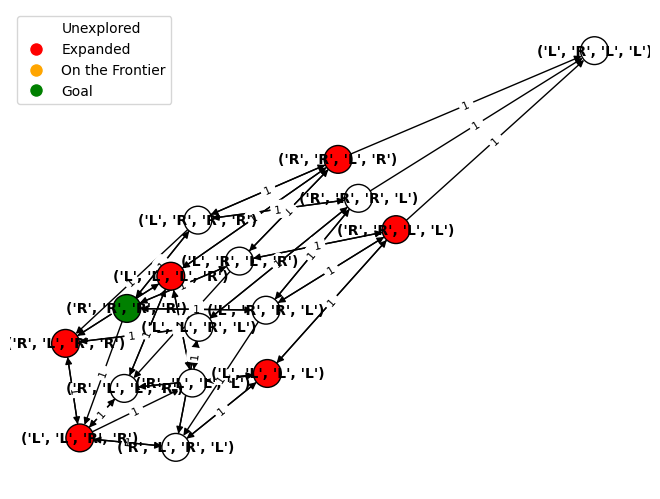

{('L', 'L', 'L', 'L'): 'expanded', ('R', 'R', 'L', 'L'): 'expanded', ('R', 'L', 'R', 'L'): 'unexplored', ('R', 'L', 'L', 'R'): 'unexplored', ('R', 'L', 'L', 'L'): 'unexplored', ('L', 'L', 'R', 'L'): 'unexplored', ('L', 'L', 'L', 'R'): 'expanded', ('R', 'R', 'R', 'L'): 'unexplored', ('R', 'R', 'L', 'R'): 'expanded', ('R', 'L', 'R', 'R'): 'expanded', ('L', 'R', 'R', 'L'): 'unexplored', ('L', 'R', 'L', 'R'): 'unexplored', ('L', 'L', 'R', 'R'): 'expanded', ('R', 'R', 'R', 'R'): 'goal', ('L', 'R', 'R', 'R'): 'unexplored', ('L', 'R', 'L', 'L'): 'expanded'}


In [13]:
def simulate_farmer_problem():
    # Create an instance of the FarmerProblem
    problem = FarmerProblem()

    # Create a BestFirstSearchAgentProgram
    agent = BestFirstSearchAgentProgram()

    # Run the agent program on the problem
    solution = agent(problem)

    # Track node statuses
    node_statuses = {node: 'unexplored' for node in problem.graph.keys()}
  #  print(node_statuses)

    if solution:
        print("Solution found!")
        print("Path to solution:")
        path = solution.path()


        for node in path:
            print(f"State: {node.state}, Action: {node.action}")
            node_statuses[node.state] = 'goal' if node.state == problem.goal_state else 'expanded'
        print(f"Total cost: {solution.path_cost}")
    else:
        print("No solution found.")

    # Visualize the graph
    drawGraph(problem, nodeColors={}, nodeStatuses=node_statuses)
    print(node_statuses)

if __name__ == "__main__":
    simulate_farmer_problem()
